## Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import graphviz
from PIL import Image

from mlxtend.plotting import plot_learning_curves

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, mean_squared_error

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Resources
General: 
- Hands on Machine Learning with scikit-learn and tensorflow, chapter 5, 6, 7

- Machine Learnia : https://www.youtube.com/watch?v=w_bLGK4Pteo


Decision Trees: 
- https://scikit-learn.org/stable/modules/tree.html
- https://www.lovelyanalytics.com/2016/08/16/decision-tree-comment-ca-marche/
- https://www.youtube.com/watch?v=ZVR2Way4nwQ
- https://www.youtube.com/watch?v=sgQAhG5Q7iY

Random Forests:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://www.youtube.com/watch?v=v6VJ2RO66Ag

SVM: 
- https://scikit-learn.org/stable/modules/svm.html
- https://towardsdatascience.com/a-brief-introduction-to-support-vector-machine-adf0f103a80f
- https://www.youtube.com/watch?v=_YPScrckx28
- https://www.youtube.com/watch?v=Q7vT0--5VII

Learning Curves: 
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
- https://towardsdatascience.com/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

Validation Curves 
- https://scikit-learn.org/stable/modules/learning_curve.html

- Take some time to read book sections for decision tree, random forest and SVM algorithms.
- Import these algorithms from scikit-learn and find the hyperparameter options that are available when they are instantiated.


## Decision trees

Explain here how they work in your own words:

ecursive split df by asking question which fits most
after - compare calues:


categorical tree - index gini, 
numerical tree - MSE

In [2]:
# Load dataset
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [3]:
iris2 = load_iris()
df_iris2 = pd.DataFrame(data=iris2.data, columns=iris2.feature_names)
df_iris2['target'] = pd.Series(iris.target)
df_iris2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Train a decision tree with max_depth=2
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [5]:
cross_val_score(clf, X, y, cv=10)

array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.86666667, 1.        , 1.        , 1.        ])

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Visualization: export_graphviz

In [7]:
# # Visualize decision tree using graphviz 
# dot_data = export_graphviz(clf)

# graph = graphviz.Source(dot_data)
# graph.render("iris_tree", format="png")

In [8]:
# open image with PIL
image = Image.open("iris_tree.png")
image.show()

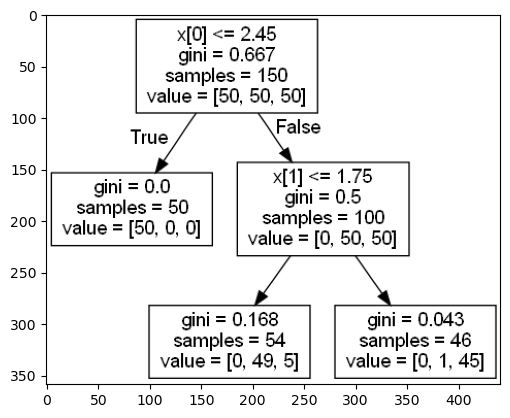

In [9]:
# open image with matplotlib
img=mpimg.imread('iris_tree.png')
imgplot = plt.imshow(img)

### Visualization: plot_tree

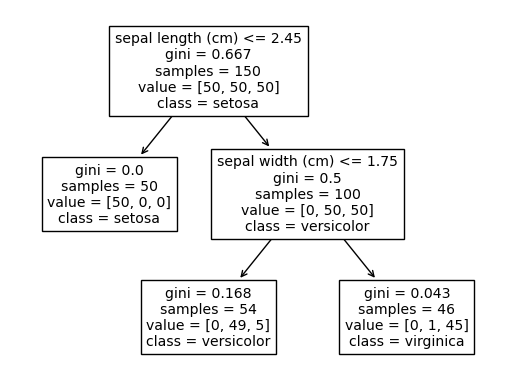

In [10]:
# visualize using the 'plot_tree' method (from the sklearn.tree module)
plot = tree.plot_tree(clf, feature_names = iris.feature_names[:2], class_names = iris.target_names)

Compute the predictions of a decision tree classifier on a test set and calculate all the classification metrics you know:


In [11]:
# split in train and test set
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y=data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
# fit classifier with max_depth=2
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [13]:
# make predictions on the test set
y_pred_dtc = dtc.predict(X_test)

In [14]:
# Print Accuracy
print('Accuracy score: %.3f' % accuracy_score(y_test, y_pred_dtc),'\n')
# Print Confusion matrix
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred_dtc)}','\n')
# Print Precision
# print('Precision: %.3f' % precision_score(y_test, y_pred_dtc, average="weighted"),'\n')
# # Print Recall
# print('Recall: %.3f' % recall_score(y_test, y_pred_dtc, average="weighted"),'\n')
# # Print F1-score
# print('F1-score: %.3f' % f1_score(y_test, y_pred_dtc, average='micro'))
print(classification_report(y_test, y_pred_dtc))

Accuracy score: 0.933 

Confusion matrix: 
 [[14  0  0]
 [ 0 13  0]
 [ 0  3 15]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.81      1.00      0.90        13
           2       1.00      0.83      0.91        18

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.95      0.93      0.93        45



## Random forests

Explain here how they work in your own words:

1- create  new  random datasets based on out data ( same number of lines)
2 - learn our tree on each sous-sets independantly ( for each sous-sets we will take diff features)
3 - compare results and take the most voted value as a result

In [15]:
# fit a Random Forest classifier 
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
# make predictions on the test set
y_pred_rfc = rfc.predict(X_test)

In [17]:
# Print Accuracy
print('Accuracy score: %.3f' % accuracy_score(y_test, y_pred_rfc),'\n')
# Print Confusion matrix
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred_rfc)}','\n')
# Print Precision
# print('Precision: %.3f' % precision_score(y_test, y_pred_rfc, average="weighted"),'\n')
# # Print Recall
# print('Recall: %.3f' % recall_score(y_test, y_pred_rfc, average="weighted"),'\n')
# # Print F1-score
# print('F1-score: %.3f' % f1_score(y_test, y_pred_rfc, average='micro'))

print(classification_report(y_test, y_pred_rfc))

Accuracy score: 0.933 

Confusion matrix: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  2 14]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.94      0.91        16
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



## SVM

Explain here how they work in your own words:

1 - looking the gap between data
2 - create a line ( vector )
3 - SVM’s way to find the best line

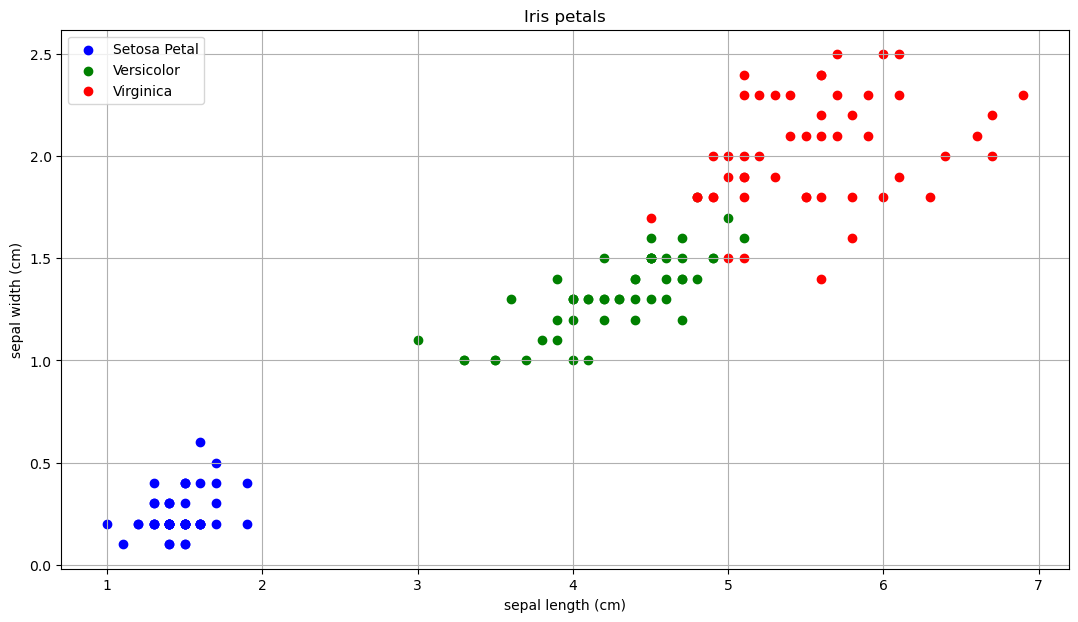

In [18]:
# Book example SVM: iris dataset
iris_df = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

species = []

for i in range(len(iris['target'])):
    if iris_df['target'][i] == 0:
        species.append("setosa")
    elif iris_df['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris_df['species'] = species


setosa = iris_df[iris_df.species == "setosa"]
versicolor = iris_df[iris_df.species=='versicolor']
virginica = iris_df[iris_df.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) 

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa Petal", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")

ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [19]:
# fit a linear SVM classifier
svc=SVC() #kernel = 'linear'
svc.fit(X_train, y_train)

SVC()

In [20]:
# make predictions on the test set
y_pred_svc=svc.predict(X_test)

In [21]:
# Print Accuracy
print('Accuracy score: %.3f' % accuracy_score(y_test, y_pred_svc),'\n')
# Print Confusion matrix
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred_svc)}','\n')
# Print Precision
# print('Precision: %.3f' % precision_score(y_test, y_pred_svc, average="weighted"),'\n')
# # Print Recall
# print('Recall: %.3f' % recall_score(y_test, y_pred_svc, average="weighted"),'\n')
# # Print F1-score
# print('F1-score: %.3f' % f1_score(y_test, y_pred_svc, average='micro'))


print(classification_report(y_test, y_pred_svc))

Accuracy score: 0.978 

Confusion matrix: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0 16]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Learning curves

### Book example

In [22]:
# Book Dataset
def plot_learning_curves_my(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y)
    train_errors, val_errors = [], []
    for m in range(2, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "b-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "r-", linewidth=3, label="val")
    plt.legend()
    plt.show()

In [23]:
X=df_iris2.drop(columns='target')
y=df_iris2['target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

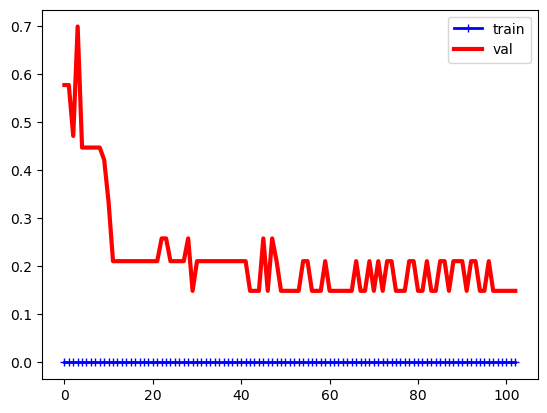

In [25]:
plot_learning_curves_my(rfc, X, y)

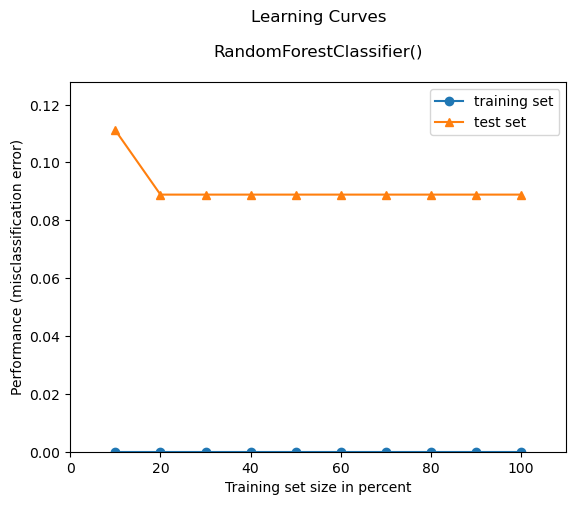

In [26]:
plot_learning_curves(X_train, y_train, X_test, y_test, rfc)
plt.show()

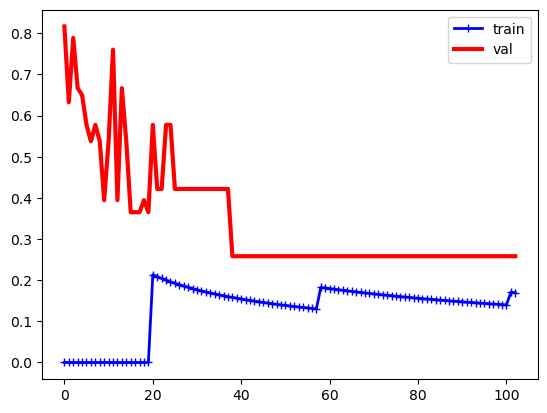

In [27]:
plot_learning_curves_my(dtc, X, y)

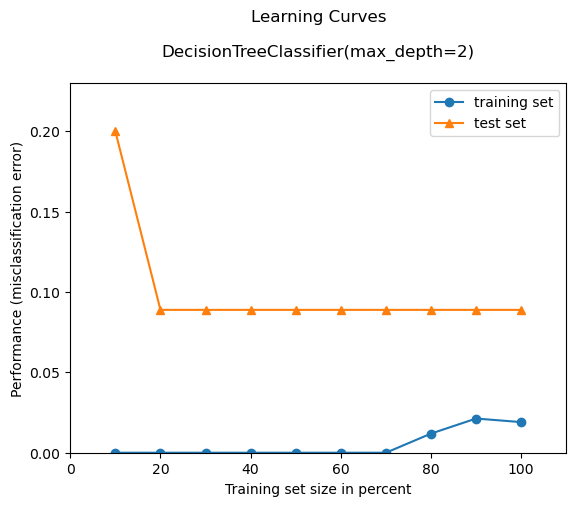

In [28]:
plot_learning_curves(X_train, y_train, X_test, y_test, dtc)
plt.show()

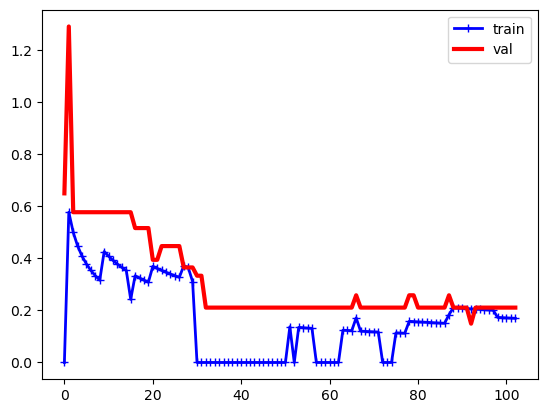

In [29]:
plot_learning_curves_my(svc, X, y)

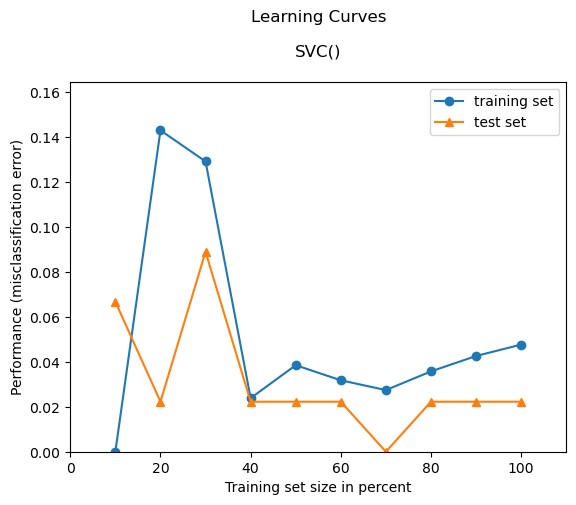

In [30]:
plot_learning_curves(X_train, y_train, X_test, y_test, svc)
plt.show()

In [31]:
# Implement the book’s code on learning curves on the data he has used.
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

Change the method so that instead of having an incremental training set size going from 1 to the size of X_train, you have a fixed set of training sizes.
For example: 

training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')

or 

training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80]

In [32]:
# Method that plots learning curves for a given estimator and training_set_sizes
def your_method_name_for_plotting_learning_curves(model, X, y, training_set_sizes=None):
    if training_set_sizes is None:
        training_set_sizes = np.linspace(2, len(X), len(X), dtype='int')

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)
    train_errors, val_errors = [], []

    for m in training_set_sizes:
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(training_set_sizes, np.sqrt(train_errors), "b-+", linewidth=2, label="train")
    plt.plot(training_set_sizes, np.sqrt(val_errors), "r-", linewidth=3, label="val")
    plt.xlabel('Training Set Size')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

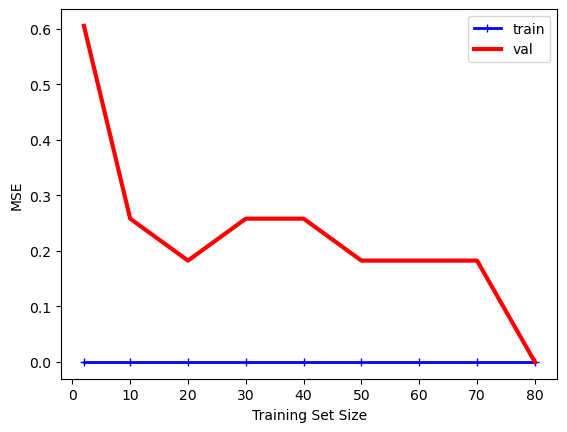

In [33]:
your_method_name_for_plotting_learning_curves(rfc, X, y, training_set_sizes = [2, 10, 20, 30, 40, 50, 60, 70, 80])

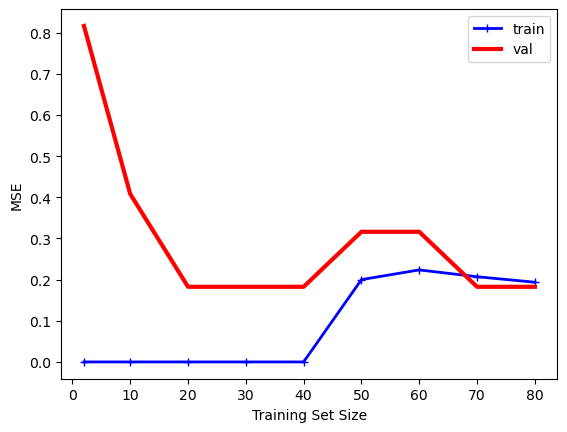

In [34]:
your_method_name_for_plotting_learning_curves(dtc, X, y, training_set_sizes = [2, 10, 20, 30, 40, 50, 60, 70, 80])

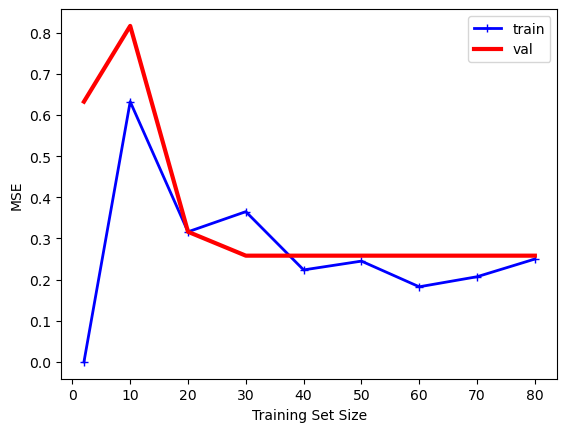

In [35]:
your_method_name_for_plotting_learning_curves(svc, X, y, training_set_sizes = [2, 10, 20, 30, 40, 50, 60, 70, 80])

## Learning curves for classifiers

Implement a ML problem on a dataset you have already seen in the course. 

Produce a plot of a model which shows signs of underfitting, and one that shows signs of overfitting.

In [36]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))
    axes.set_title(title)
    
    if ylim is not None:
        axes.set_ylim(*ylim)
        
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, _, _ = learning_curve(
        estimator, 
        X_train, 
        y_train, 
        cv=cv, 
        n_jobs=n_jobs, 
        train_sizes=train_sizes, 
        return_times=True,
        scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axes.grid()
    
    axes.fill_between(
        train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
        color="b"
    )
    axes.fill_between(
        train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
        color="r"
    )
    axes.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Accuracy score")
    axes.legend(loc="best")

    return axes

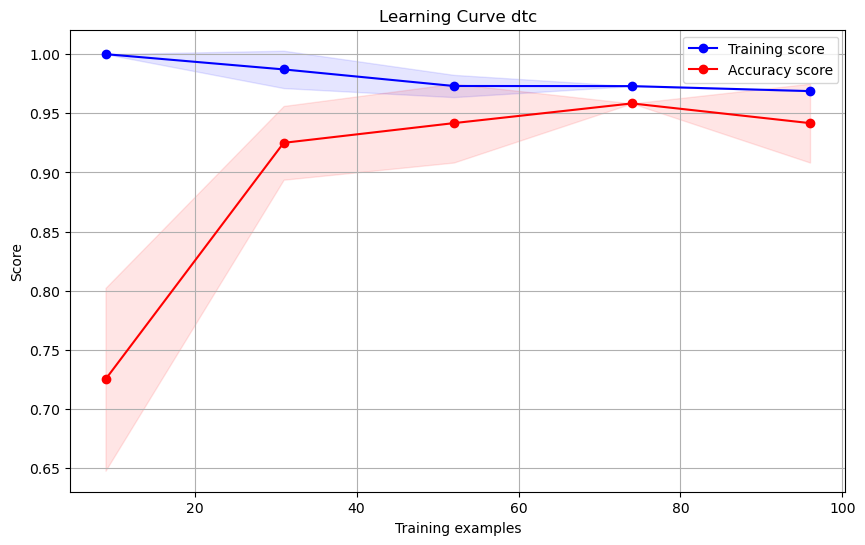

In [37]:
plot_learning_curve(dtc, "Learning Curve dtc", X, y, cv=5)
plt.show()

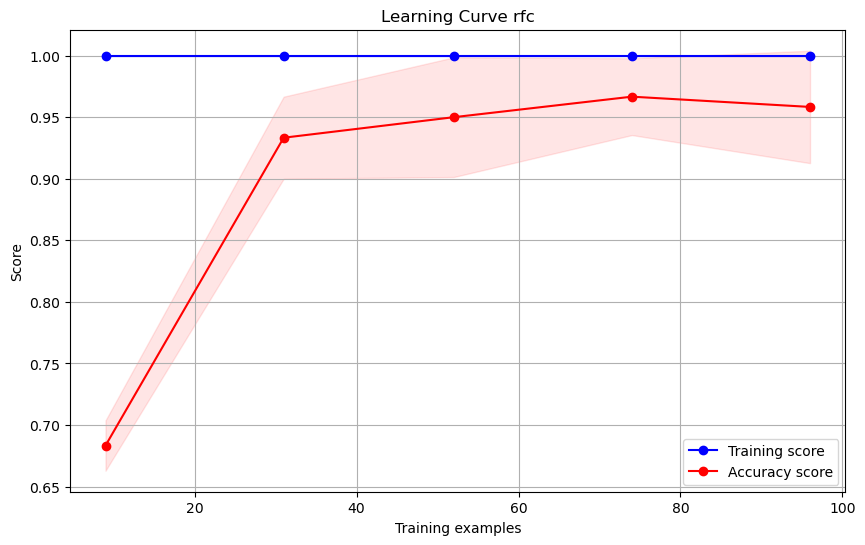

In [38]:

plot_learning_curve(rfc, "Learning Curve rfc", X, y, cv=5)
plt.show()

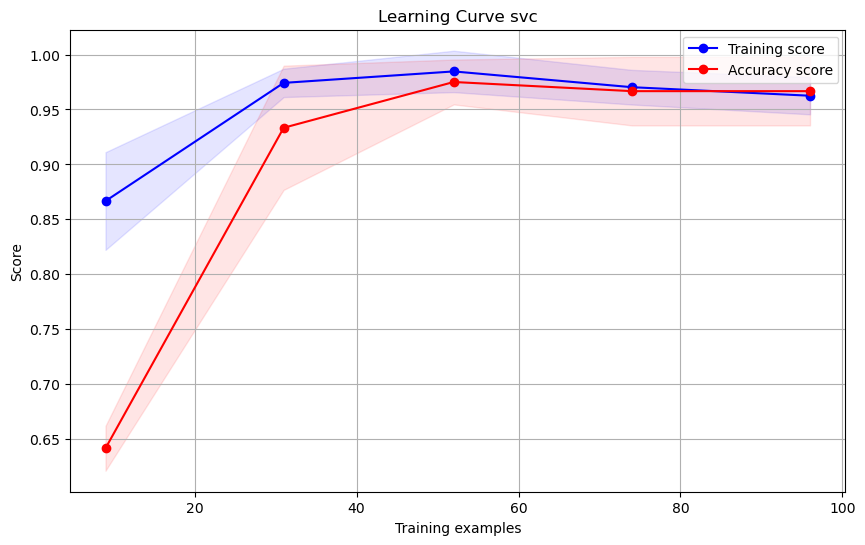

In [39]:

plot_learning_curve(svc, "Learning Curve svc", X, y, cv=5)
plt.show()

## Decision trees learning curves

In [40]:
# import the dataset you want
df_heart = pd.read_csv('./data/heart.csv')

In [41]:
# do all the pre-rpocessing that is needed

X=df_heart.drop(columns='target')
y=df_heart['target']


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Training Accuracy :  80.18867924528303
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        48
           1       0.83      0.70      0.76        43

    accuracy                           0.79        91
   macro avg       0.80      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



<Axes: title={'center': 'Learning Curve DTC'}, xlabel='Training examples', ylabel='Score'>

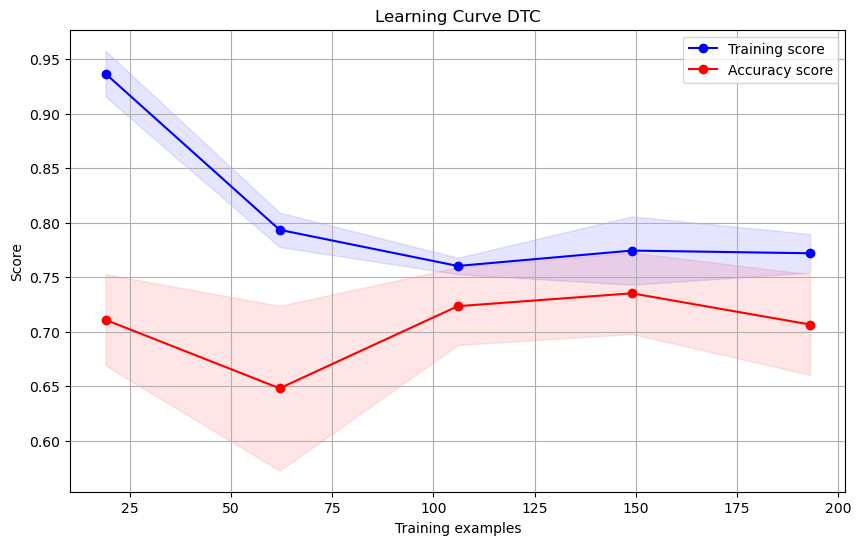

In [43]:
# Underfit model
# Train a decision tree with max_depth=2

dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train, y_train)

y_pred_dtc_heart = dtc.predict(X_test)

print('Training Accuracy : ',
    accuracy_score(y_train, 
                            dtc.predict(X_train))*100)


print(classification_report(y_test, y_pred_dtc_heart))

plot_learning_curve(dtc, "Learning Curve DTC", X, y, cv=5)


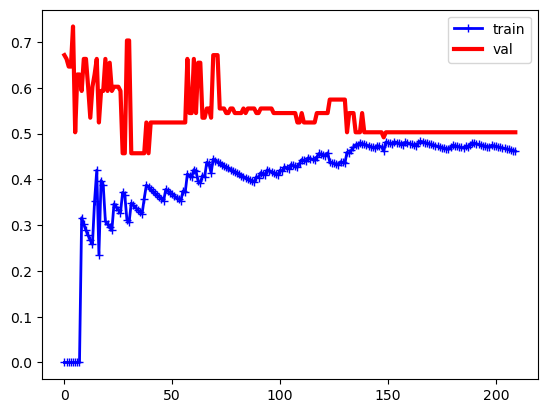

In [44]:
plot_learning_curves_my(dtc, X, y)

Training Accuracy :  100.0
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        48
           1       0.76      0.60      0.68        43

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.72        91



<Axes: title={'center': 'Learning Curve DTC'}, xlabel='Training examples', ylabel='Score'>

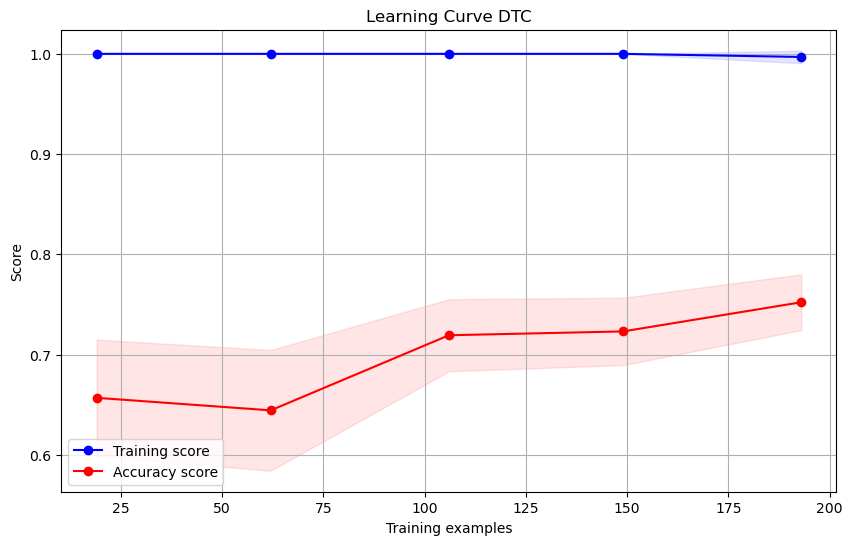

In [45]:
# Overfit model
# Train a decision tree with max_depth=10

dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train, y_train)

y_pred_dtc_heart = dtc.predict(X_test)

print('Training Accuracy : ',
    accuracy_score(y_train, 
                            dtc.predict(X_train))*100)

print(classification_report(y_test, y_pred_dtc_heart))
plot_learning_curve(dtc, "Learning Curve DTC", X, y, cv=5)

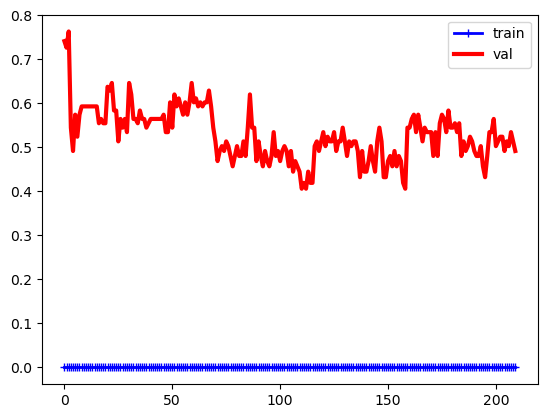

In [46]:
plot_learning_curves_my(dtc, X, y)

## Random forests classifier learning curves

Training Accuracy :  88.67924528301887
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        48
           1       0.76      0.60      0.68        43

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.72        91



<Axes: title={'center': 'Learning Curve DTC'}, xlabel='Training examples', ylabel='Score'>

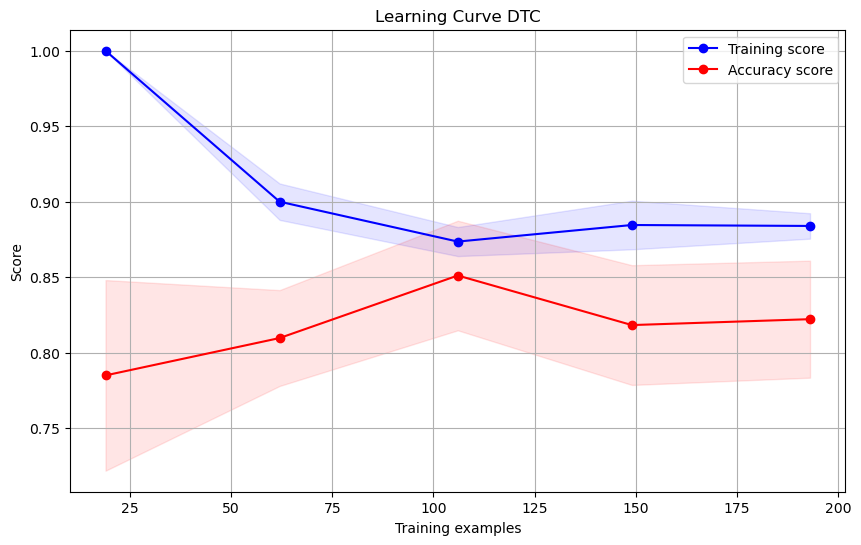

In [47]:
# Underfit model
rfc = RandomForestClassifier(max_depth=2)
rfc.fit(X_train, y_train)

y_pred_rfc_heart = rfc.predict(X_test)

print('Training Accuracy : ',
    accuracy_score(y_train, 
                            rfc.predict(X_train))*100)


print(classification_report(y_test, y_pred_dtc_heart))

plot_learning_curve(rfc, "Learning Curve DTC", X, y, cv=5)

Training Accuracy :  100.0
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        48
           1       0.76      0.60      0.68        43

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.72        91



<Axes: title={'center': 'Learning Curve DTC'}, xlabel='Training examples', ylabel='Score'>

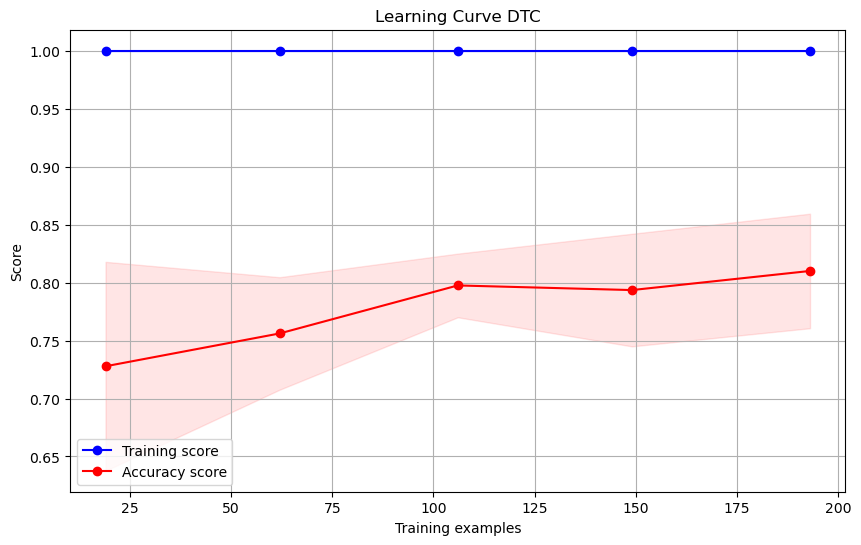

In [48]:
# Overfit model
rfc = RandomForestClassifier(max_depth=10)
rfc.fit(X_train, y_train)

y_pred_rfc_heart = rfc.predict(X_test)

print('Training Accuracy : ',
    accuracy_score(y_train, 
                            rfc.predict(X_train))*100)


print(classification_report(y_test, y_pred_dtc_heart))

plot_learning_curve(rfc, "Learning Curve DTC", X, y, cv=5)

## SVM

SVM Advantages:

- SVM’s are very good when we have no idea on the data.
- Works well with even unstructured and semi structured data like text, Images and trees.
- The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
- Unlike in neural networks, SVM is not solved for local optima.
- It scales relatively well to high dimensional data.
- SVM models have good generalization in practice, the risk of over-fitting is less in SVM.

SVM Disadvantages:

- Choosing a “good” kernel function is not easy.
- Long training time for large datasets.
- Difficult to understand and interpret the final model, variable weights and individual impact.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

Training Accuracy :  65.09433962264151
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        48
           1       0.76      0.60      0.68        43

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.72        91



<Axes: title={'center': 'Learning Curve SVC'}, xlabel='Training examples', ylabel='Score'>

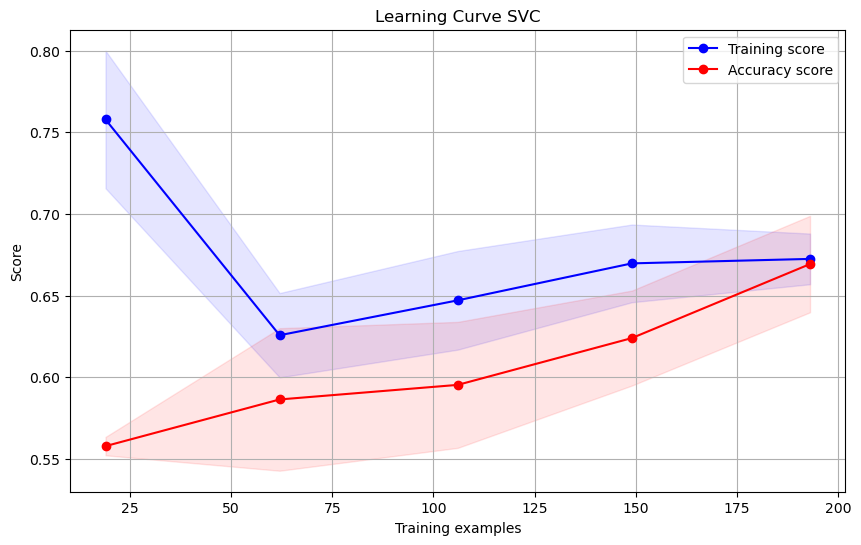

In [49]:
# Underfit model?
svc = SVC()
svc.fit(X_train, y_train)

y_pred_svc_heart = svc.predict(X_test)

print('Training Accuracy : ',
    accuracy_score(y_train, 
                            svc.predict(X_train))*100)


print(classification_report(y_test, y_pred_dtc_heart))

plot_learning_curve(svc, "Learning Curve SVC", X, y, cv=5)

Training Accuracy :  88.20754716981132
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        48
           1       0.76      0.60      0.68        43

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.72        91



<Axes: title={'center': 'Learning Curve SVC'}, xlabel='Training examples', ylabel='Score'>

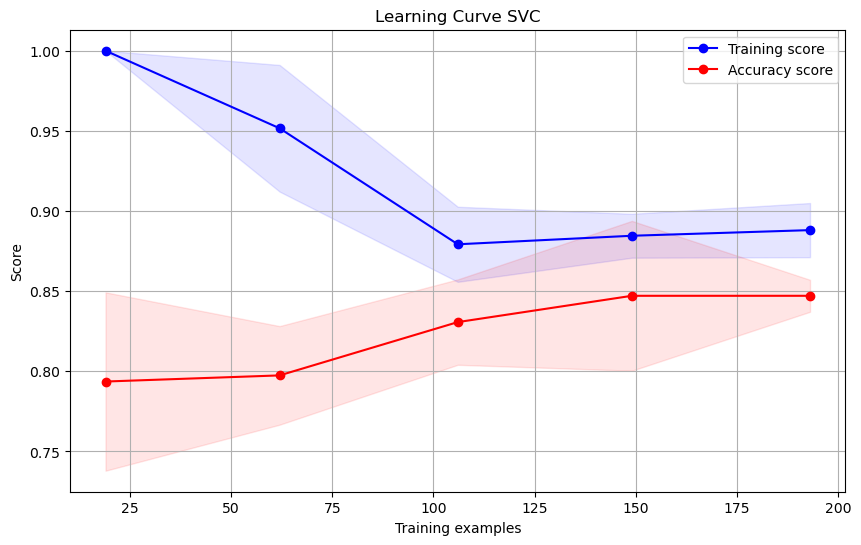

In [50]:
# Overfit model?
svc = SVC(kernel='linear', gamma =10**(-5))
svc.fit(X_train, y_train)

y_pred_svc_heart = svc.predict(X_test)

print('Training Accuracy : ',
    accuracy_score(y_train, 
                            svc.predict(X_train))*100)


print(classification_report(y_test, y_pred_dtc_heart))

plot_learning_curve(svc, "Learning Curve SVC", X, y, cv=5)

## Validation curves

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters. They are complementaru of GridSearch and make for a very nice visual tool for ypur algorithm optimization. 


In [51]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, param_range=None, param_name=None):
        if axes is None:
                _, axes = plt.subplots()

        train_scores, test_scores = validation_curve(
        estimator,
        X,
        y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
        scoring="accuracy",
        n_jobs=n_jobs
        )

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        axes.set_title(title)
        axes.set_xlabel(param_name)
        axes.set_ylabel("Score")

        if ylim is not None:
                axes.set_ylim(*ylim)

        axes.fill_between(param_range, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.2,color="darkorange", lw=2)
        axes.fill_between(param_range, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.2,color="navy", lw=2)

        axes.semilogx(param_range, test_scores_mean, label="Cross-validation score",color="navy", lw=2)
        axes.semilogx(param_range, train_scores_mean, label="Training score",color="darkorange", lw=2)
        
        axes.grid()
        axes.legend(loc="best")
        
        return plt

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


#SVM - use standart scaler before  --> gamma valuer nt so big 

In [53]:
pipe.fit(X_train, y_train)
y_pred_pipe = pipe.predict(X_test)

print(classification_report(y_test, y_pred_pipe))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.88      0.86      0.87        35

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



<module 'matplotlib.pyplot' from 'c:\\Users\\eduard.vlasov\\AppData\\Local\\anaconda3\\envs\\arbres\\Lib\\site-packages\\matplotlib\\pyplot.py'>

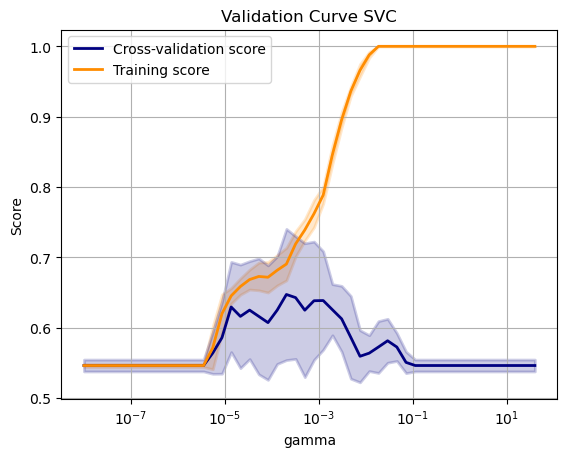

In [54]:
svc = SVC()
plot_validation_curve(svc, "Validation Curve SVC", X_train, y_train, cv=5,param_name='gamma', param_range=np.logspace(-8, np.log10(40), 50), n_jobs=-1)

Plot the validation curves for a chosen algorithm and vary 1 or 2 parameters of your choice.

Do a GridSearch and see if the most optimal parameter is coherent with what you see on your validation curves

In [55]:
rfc_params = {'n_estimators':[100, 200], 
       'criterion':['gini', 'entropy', 'log_loss'], 
       'max_depth':[None, 5, 10, 15], 
       'min_samples_split':[2, 5],
       'max_features': ['sqrt', 'log2'],
    }

dtc_params = {'criterion': ['gini', 'entropy', 'log_loss'],
       'splitter':['best', 'random'],
       'max_depth':[None, 5, 10, 15],
       'min_samples_split':[2, 5],
       'min_samples_leaf':[1,2]
    }

svm_params = {'C':np.arange(1, 1000, 20),
              'gamma': np.logspace(-8, np.log10(40), 50)
    }


In [56]:
# Grid search
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
GSCV = GridSearchCV(rfc, rfc_params, cv = 5, n_jobs=-1)
GSCV.fit(X_train, y_train)

print(GSCV.best_params_)
print(GSCV.best_score_)

{'criterion': 'log_loss', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
0.8325603864734299


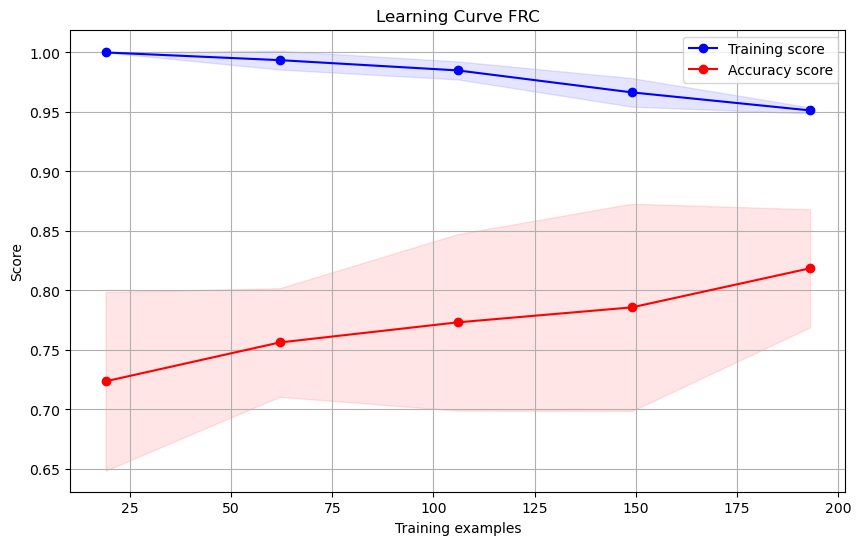

In [57]:
rfc = RandomForestClassifier(criterion= 'log_loss', max_depth= 5, max_features='sqrt', min_samples_split= 2, n_estimators= 100)

plot_learning_curve(rfc, "Learning Curve FRC", X, y, cv=5)
plt.show()

In [58]:
dtc = DecisionTreeClassifier()
GSCV = GridSearchCV(dtc, dtc_params, cv = 5, n_jobs=-1)
GSCV.fit(X_train, y_train)

print(GSCV.best_params_)
print(GSCV.best_score_)

{'criterion': 'log_loss', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
0.7933333333333333


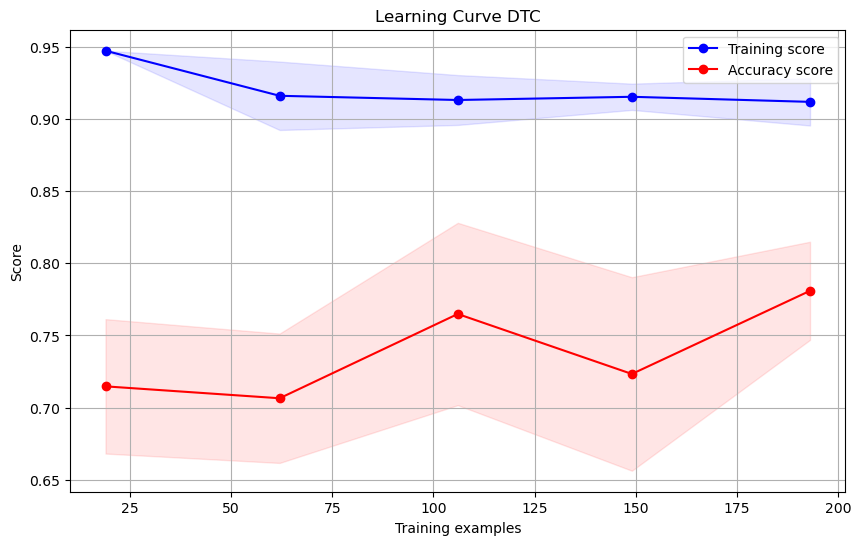

In [59]:
dtc = DecisionTreeClassifier(criterion= 'gini', max_depth= None, min_samples_leaf=2, min_samples_split= 5, splitter= 'random')

plot_learning_curve(dtc, "Learning Curve DTC", X, y, cv=5)
plt.show()

In [60]:
svc = SVC()
GSCV = GridSearchCV(svc, svm_params, cv = 5, n_jobs=-1)
GSCV.fit(X_train, y_train)

print(GSCV.best_params_)
print(GSCV.best_score_)

{'C': 981, 'gamma': 2.1445043709872594e-05}
0.797391304347826


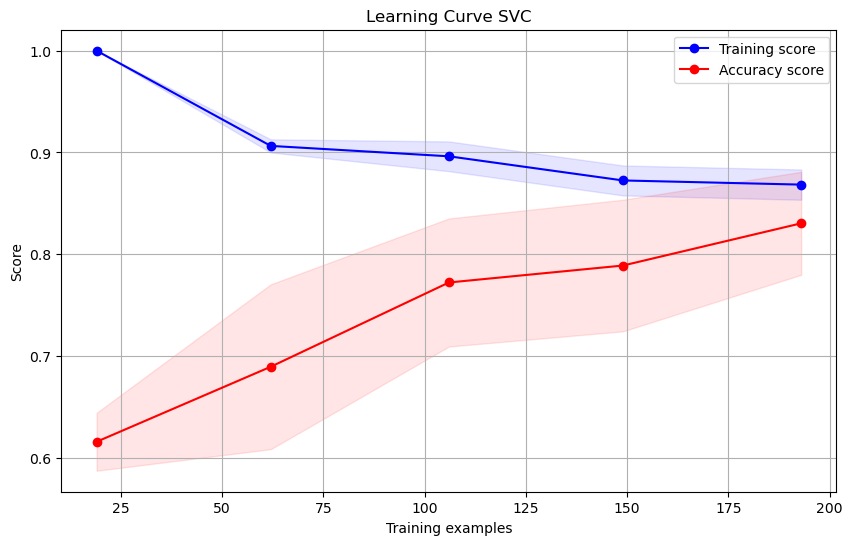

In [61]:
svc = SVC(C= 981, gamma= 2.1445043709872594e-05)

plot_learning_curve(svc, "Learning Curve SVC", X, y, cv=5)
plt.show()